## <center>Cluster Analysis Model</center>
#### <center>Arificial Intelligence for Communication and Marketing</center>
#### <center>Sotgia Francesca - 513067</center>

## Context
A multichannel retail company regularly runs targeted promotional campaigns but despite marketing investments, the reponse rate to the campaigns remained low. 

To deal with this problem, the CMO of the company wants to segment the customers with the objective of identify groups of customers with similar behaviors to provide better personalized communications and maximize the ROI of the marketing capaigns.

## Import Libraries
The dataset used in the project provides historical customer behaviors and includes multiple variables relevant for the given task.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

## Import the dataset

In [2]:
# Import the dataset
df_raw = pd.read_excel('data.xlsx')

# Display the first rows of the dataset
df_raw.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


The dataset contains demographic attributes, behavioral patterns and historical campaign response data.

| Feature Name | Feature Type | Feature Description |
|:-------------- |:---------------|:----------------------|
| ID | Numeric | Unique Identifier |
| Year_Birth | Numeric | Year of Birth of the customer |
| Education | String | Education Level |
| Marital_Status | String | Marital Status |
| Income | Numeric | Yearly Income |
| Kindhome | Numeric | Number of children | 
| Teenhome | Numeric | Number of teenagers |
| Dt_Customer | String | Date of enrollment |
| Recency | Numeric | Number of days since last purchase |
| MntWines | Numeric | Amount spent on wine products in last 2 years |
| MntFruit | Numeric | Amount spent on fruit products in last 2 years |
| MntMeatProducts | Numeric | Amount spent on meat products in last 2 years |
| MntFishProducts | Numeric | Amount spent on fish products in last 2 years |
| MntSweetProducts | Numeric | Amount spent on sweet products in last 2 years |
| MntGoldProducts | Numeric | Amount spent on gold products in last 2 years |
| NumDealsPurchases | Numeric | Number of purchases made with discount |
| NumWebPurchases | Numeric | Number of purchases made through website |
| NumCatalogPurchases | Numeric | Number of purchases made using catalog |
| NumStorePurchases | Numeric | Number of purchases made in store |
| NumWebVisitsMonth | Numeric | Number of website visits in last month |
| AcceptedCmp1 | Boolean | 1 if customer accepted offer in Campaign 1, else 0 |
| AcceptedCmp2 | Boolean | 1 if customer accepted offer in Campaign 2, else 0 |
| AcceptedCmp3 | Boolean | 1 if customer accepted offer in Campaign 3, else 0 |
| AcceptedCmp4 | Boolean | 1 if customer accepted offer in Campaign 4, else 0 |
| AcceptedCmp5 | Boolean | 1 if customer accepted offer in Campaign 5, else 0 |
| Complain | Boolean | 1 if customer complained in last 2 years, else 0 |
| Z_CostContract | Numeric | Cost associated with last marketing contact |
| Z_Revenue | Numeric | Revenue from the customer |
| Response | Boolean | 1 if customer accepted the offer in last campaign, else 0 |

## Data exploration

Get the number of columns and rows

In [3]:
print(f'Columns: {df_raw.shape[1]}\nRows: {df_raw.shape[0]}')

Columns: 29
Rows: 2240


We can observe that the dataset contains:
- 29 columns, representing the features
- 2240 rows, indicating the customers

Get informations about the datset with the <code>info()</code> method.

The <code>info()</code> method allows us to obtain the number of non-null values present in each column and their dtype.

In [4]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Check if there are duplicates in the dataset

In [5]:
df_raw.duplicated().sum()

0

We can observe that there are no duplicates in the data

### Inspect missing values

We want to know how many missing values are present in each column.

It is important identifying the missing values to understand which rows or columns may be useful to drop or modify. 

In [6]:
df_raw.isnull().sum(axis=0)

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

We can observe that 'Income' is the only column that presents missing values.

### Get unique values for each feature

Get the uniques values present in each feature.

In [7]:
for column in df_raw.columns:
    print(f'Column: {column} - Unique Values: {df_raw[column].unique()}')
    print('='*80)

Column: ID - Unique Values: [5524 2174 4141 ... 7270 8235 9405]
Column: Year_Birth - Unique Values: [1957 1954 1965 1984 1981 1967 1971 1985 1974 1950 1983 1976 1959 1952
 1987 1946 1980 1949 1982 1979 1951 1969 1986 1989 1963 1970 1973 1943
 1975 1996 1968 1964 1977 1978 1955 1966 1988 1948 1958 1972 1960 1945
 1991 1962 1953 1961 1956 1992 1900 1893 1990 1947 1899 1993 1994 1941
 1944 1995 1940]
Column: Education - Unique Values: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']
Column: Marital_Status - Unique Values: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Column: Income - Unique Values: [58138. 46344. 71613. ... 56981. 69245. 52869.]
Column: Kidhome - Unique Values: [0 1 2]
Column: Teenhome - Unique Values: [0 1 2]
Column: Dt_Customer - Unique Values: ['2012-09-04' '2014-03-08' '2013-08-21' '2014-02-10' '2014-01-19'
 '2013-09-09' '2012-11-13' '2013-05-08' '2013-06-06' '2014-03-13'
 '2013-11-15' '2012-10-10' '2012-11-24' '2012-12-24' '2012-08-31'
 '

Get unique values count for each column

In [8]:
for column in df_raw.columns:
    print(df_raw[column].value_counts())
    print('-'*50)

ID
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: count, Length: 2240, dtype: int64
--------------------------------------------------
Year_Birth
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: count, dtype: int64
--------------------------------------------------
Education
Graduation    1127
PhD            486
Master     

### Extract year of enrollment 
We can observe that the 'Dt_Customer' column contains the dates when the customers have enrolled in string form and they indicates the year, month and day. We want the extract the year of the enrollment and store it in a column called 'Year_enroll' in numerical form.

Start by converting 'Dt_Customer' column into datetime format to extract the years of enrollment. 

Then add the column 'Year_enroll' to the datset, which contains the years of enrollment, and drop the 'Dt_Customer' column.

In [9]:
df_clean = df_raw.copy()

In [10]:
# Transform 'Dt_Customer' to datetime format
df_clean['Dt_Customer'] = pd.to_datetime(df_clean['Dt_Customer'])

# Extract the year from 'Dt_Customer' and store it into a new column 'Year_enroll'
df_clean['Year_enroll'] = df_clean['Dt_Customer'].dt.year.astype('int64')

In [11]:
# Drop the 'Dt_Customer' column
df_clean.drop(
    columns=['Dt_Customer'],
    axis=1,
    inplace=True)

#### Understand the distribution of the features

Visualize the characteristics of the datset

In [12]:
df_clean.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_enroll
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107,2013.028125
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274,0.684554
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2012.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,2013.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,2014.000000


Visualize the distribution of numerical features across the customers

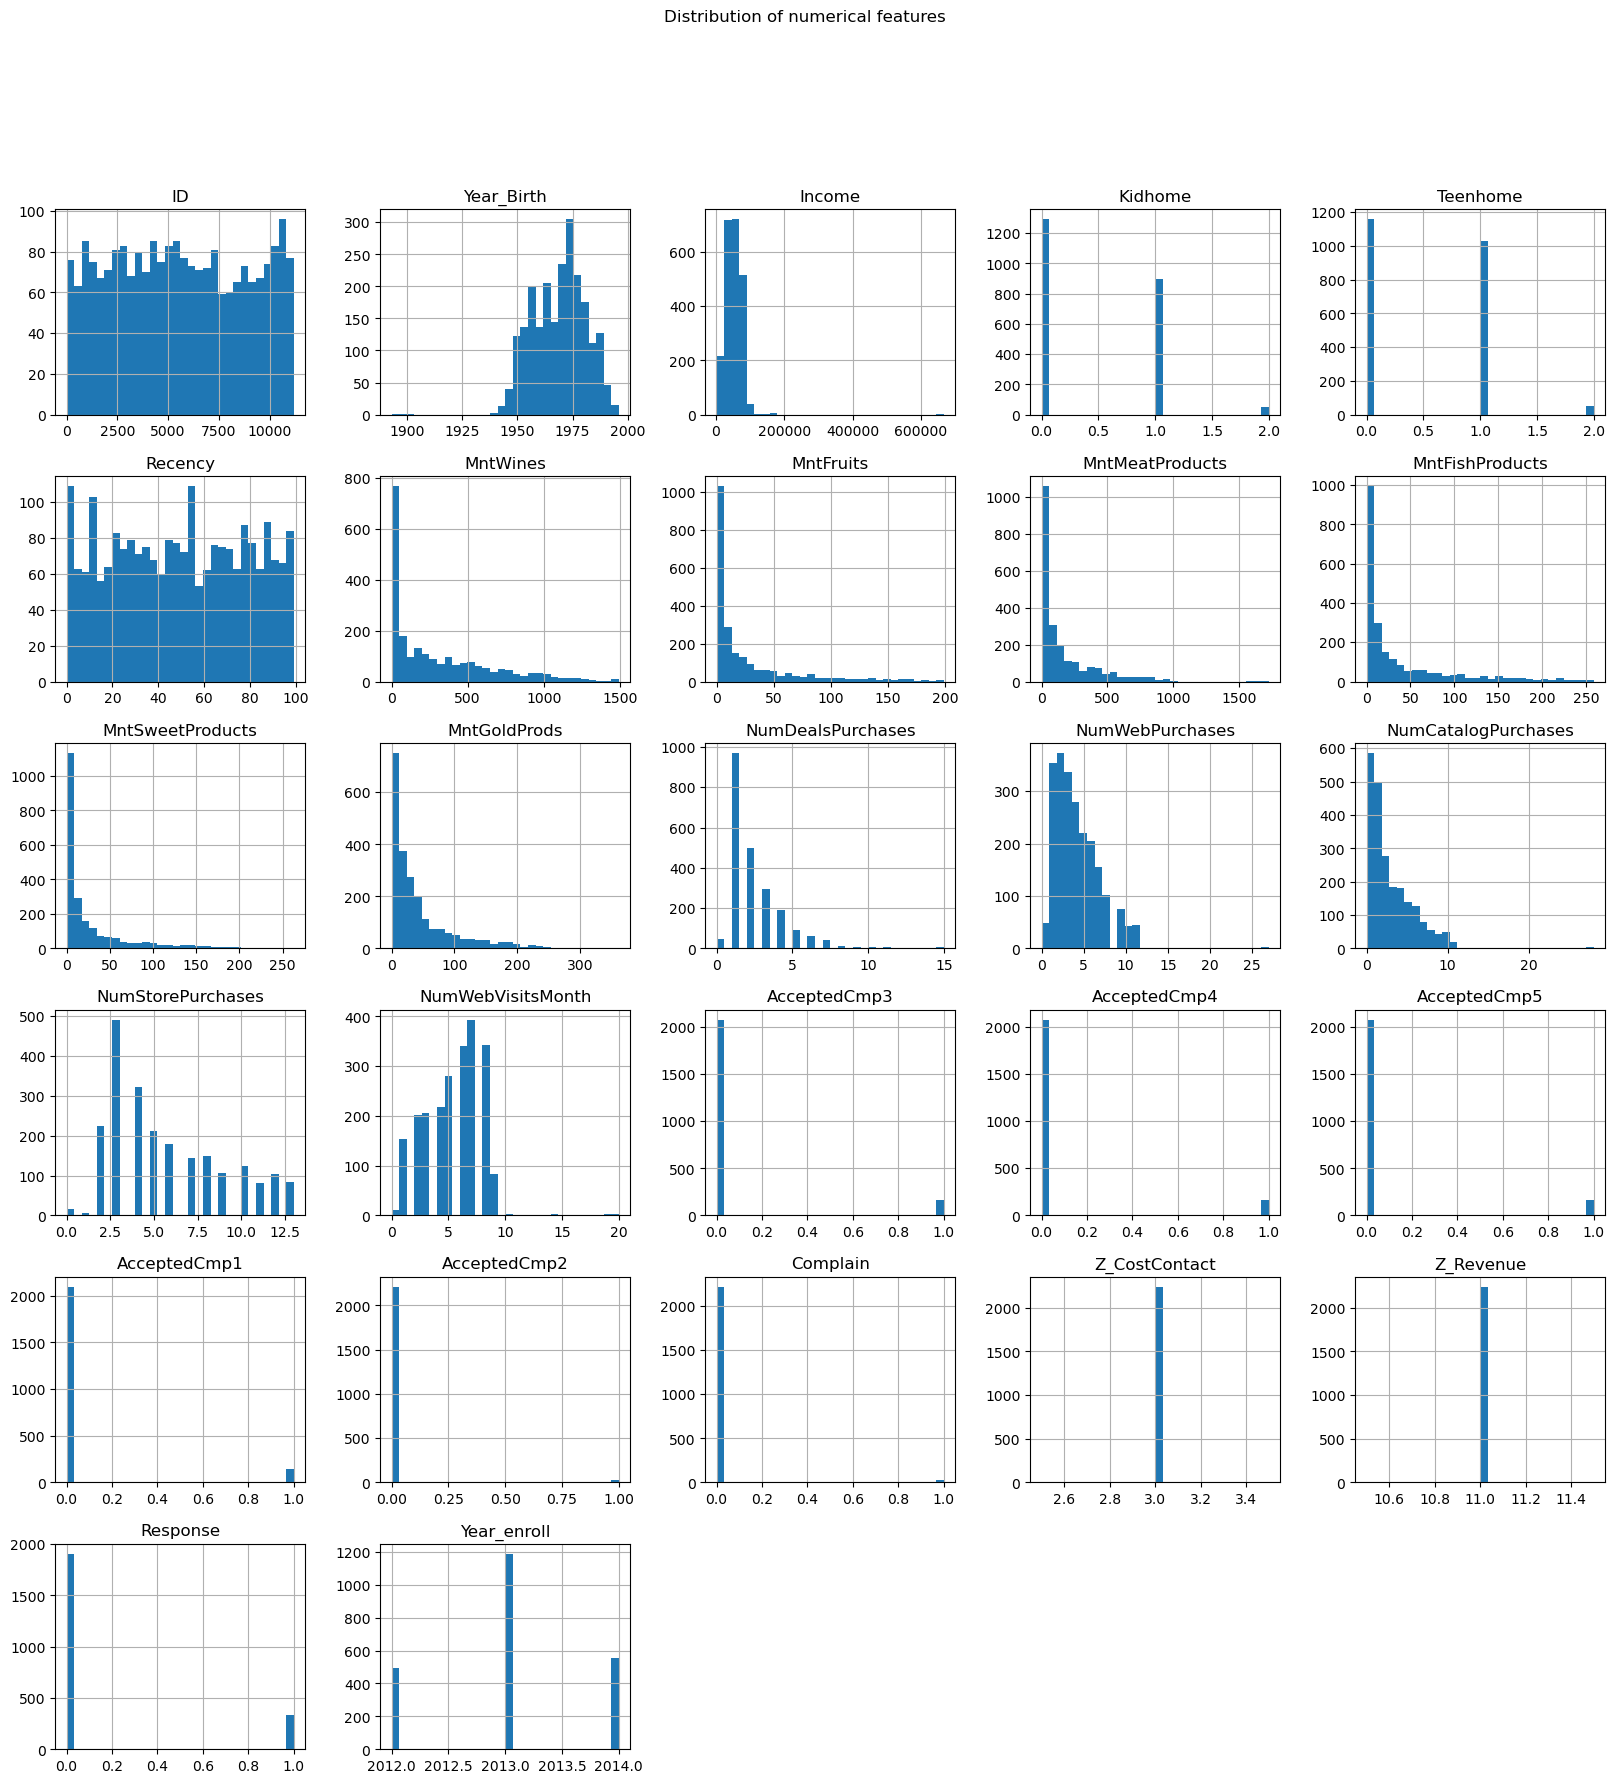

In [13]:
# Get all the numerical feautures
num_cols = (df_clean.dtypes[df_clean.dtypes != 'object'].index)

# Visualize the distribution of numerical features
df_clean[num_cols].hist(figsize=(20, 20), bins=30)
plt.suptitle('Distribution of numerical features')
plt.show()

In [14]:
# Get the unique values and their counts in 'Z_CostContact' and 'Z_Revenue'
print(f'Z_CostContact unique values:\n {df_clean['Z_CostContact'].value_counts()}')
print(f'\n\nZ_Revenue unique values:\n {df_clean['Z_Revenue'].value_counts()}')

Z_CostContact unique values:
 Z_CostContact
3    2240
Name: count, dtype: int64


Z_Revenue unique values:
 Z_Revenue
11    2240
Name: count, dtype: int64


We can observe that the columns 'Z_CostContact' and 'Z_Revenue' have a constant value for each row, thus, we can drop them beacuse they don't carry relevant information for our project.

Visualize the distribution of categorical features across the customers

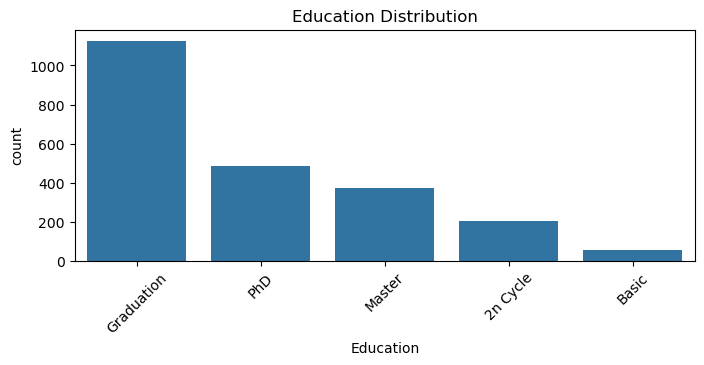

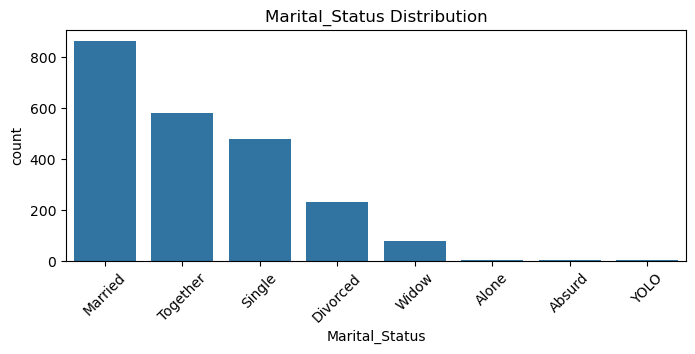

In [15]:
# Get all the categorical feautures
cat_cols = (df_clean.dtypes[df_clean.dtypes == 'object'].index)

# Visualize the distribution of categorical features
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df_clean, x=col, order=df_clean[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.xticks(rotation=45)
    plt.show()

In [16]:
# Get the unique values and their counts in 'Marital_Status'
print(f'Marital_Status unique values: {df_clean['Marital_Status'].value_counts()}')

Marital_Status unique values: Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64


By looking at the distribution of the 'Marital_Status' column, we can observe that we can make some adjustment to have more meaningful data.

- Merge 'Married' and 'Together' since they both represent customers in a relationship.
- Merge 'Divorced' and 'Widow' since they both represent customers not longer in a marriage and they might share similar behaviors. 
- Merge 'Single' and 'Alone' because they have the same meaning.
- Drop 'Absurd' and 'YOLO' since they do not make sense and would represent outliers in the model.

In [17]:
# Rename 'Married' to 'In_Relationship'
df_clean['Marital_Status'] = np.where(
    df_clean['Marital_Status'] == 'Married', 'In_Relationship',
    df_clean['Marital_Status']
)

# Rename 'Together' to 'In_Relationship'
df_clean['Marital_Status'] = np.where(
    df_clean['Marital_Status'] == 'Together', 'In_Relationship',
    df_clean['Marital_Status']
)

# Rename 'Divorced' to 'Previously_Married'
df_clean['Marital_Status'] = np.where(
    df_clean['Marital_Status'] == 'Divorced', 'Previously_Married',
    df_clean['Marital_Status']
)

# Rename 'Widow' to 'Previously_Married'
df_clean['Marital_Status'] = np.where(
    df_clean['Marital_Status'] == 'Widow', 'Previously_Married',
    df_clean['Marital_Status']
)

# Rename 'Alone' to 'Single'
df_clean['Marital_Status'] = np.where(
    df_clean['Marital_Status'] == 'Alone', 'Single',
    df_clean['Marital_Status']
)

# Drop 'Absurd' and 'YOLO' 
df_clean = df_clean[~df_clean['Marital_Status'].isin(['Absurd', 'YOLO'])]

# Display the unique values and their counts in 'Marital_Status'
print(f'Marital_Status unique values after changes:\n\n {df_clean['Marital_Status'].value_counts()}')

Marital_Status unique values after changes:

 Marital_Status
In_Relationship       1444
Single                 483
Previously_Married     309
Name: count, dtype: int64


Visualize the distribution of 'Marital_Status' after the these changes

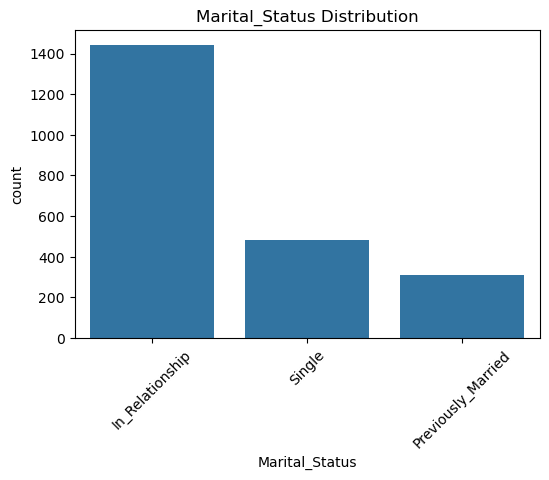

In [18]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df_clean, x='Marital_Status', order=df_clean['Marital_Status'].value_counts().index)
plt.title(f'Marital_Status Distribution')
plt.xticks(rotation=45)
plt.show()

## Preprocessing
Clean the dataset based on the what we observed in the data expoloration.

Clean the dataset is an important procedure because it allows us to have consistent and more meaningful data.

We will proceed with:
- Elimination of unnecessary columns
- Handling of missing values
- Convertion of categorical features into numerical features
- Scaling of the data

### Drop columns
Drop the unnecessary columns.
- Z_CostContact: it has constant value 
- Z_Revenue: it has constant value


In [19]:
df_clean.drop(
    columns=['Z_CostContact', 'Z_Revenue'],
    axis=1,
    inplace=True)

### Deal with missing values
We observed that the only column containing missing values is 'Income'.

Since the 'Income' feature is of type float64 we can fill the missing values with the mean of the values present in the column.

In [20]:
df_clean['Income'] = df_clean['Income'].fillna(df_clean['Income'].mean())

### Convert categorical features into numerical features
Apply <code>LabelEncoder</code> to the categorical feaures, which are 'Education' and 'Marital_Status', to encode the labels with value between 0 and n_classes-1.


In [21]:
# Define the LabelEncoder
label_encoder = LabelEncoder()

# Apply the LabelEncoder to the categorical features
df_clean['Education'] = label_encoder.fit_transform(df_clean['Education'])
df_clean['Marital_Status'] = label_encoder.fit_transform(df_clean['Marital_Status'])

### Scale the features
Normalize all the features to be in range [0, 1] using <code>MinMaxScaler</code>

In [22]:
# Define the scaler
scaler = MinMaxScaler()

# Apply the scaler to the whole dataset
dataset = pd.DataFrame(scaler.fit_transform(df_clean.drop(columns=['ID'])), columns=df_clean.drop(columns=['ID']).columns)
dataset.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_enroll
0,0.621359,0.5,1.0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,...,0.307692,0.35,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.592233,0.5,1.0,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,...,0.153846,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.699029,0.5,0.0,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,...,0.769231,0.20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
3,0.883495,0.5,0.0,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,...,0.307692,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.854369,1.0,0.0,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,...,0.461538,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


### Inspect dataset after preprocessing
Get informations about the dataset after the preprocessing

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2236 entries, 0 to 2235
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2236 non-null   float64
 1   Education            2236 non-null   float64
 2   Marital_Status       2236 non-null   float64
 3   Income               2236 non-null   float64
 4   Kidhome              2236 non-null   float64
 5   Teenhome             2236 non-null   float64
 6   Recency              2236 non-null   float64
 7   MntWines             2236 non-null   float64
 8   MntFruits            2236 non-null   float64
 9   MntMeatProducts      2236 non-null   float64
 10  MntFishProducts      2236 non-null   float64
 11  MntSweetProducts     2236 non-null   float64
 12  MntGoldProds         2236 non-null   float64
 13  NumDealsPurchases    2236 non-null   float64
 14  NumWebPurchases      2236 non-null   float64
 15  NumCatalogPurchases  2236 non-null   f

In [24]:
dataset.isnull().sum(axis=0)

Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Response               0
Year_enroll            0
dtype: int64

In [25]:
dataset.describe()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response,Year_enroll
count,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,...,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000,2236.000000
mean,0.735888,0.598055,0.285107,0.075951,0.222496,0.253131,0.496436,0.203532,0.132015,0.096768,...,0.445335,0.265877,0.072898,0.074687,0.072451,0.063953,0.013417,0.009392,0.148479,0.514535
std,0.116317,0.281168,0.411520,0.037676,0.269276,0.272307,0.292474,0.225637,0.199806,0.130886,...,0.250289,0.121238,0.260027,0.262944,0.259291,0.244725,0.115077,0.096477,0.355654,0.341910
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.640777,0.500000,0.000000,0.050791,0.000000,0.000000,0.242424,0.015405,0.005025,0.009275,...,0.230769,0.150000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
50%,0.747573,0.500000,0.000000,0.075213,0.000000,0.000000,0.494949,0.115874,0.040201,0.038841,...,0.384615,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
75%,0.815534,0.750000,0.500000,0.100099,0.500000,0.500000,0.747475,0.338245,0.165829,0.134493,...,0.615385,0.350000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


We can observe that after preprocessing the dataset does not contain missing values and all the features are normalized.

## Cluster analysis
Perform cluster analysis to segment the customers based on their demographic attributes, behavioral patterns and historical response data.

### K-Means Clustering
K-means clustering is a partitioning methods that iteratively reallocates the customers in the clusters in order to improve their representativeness. 

It starts by making a random choice that constitutes the centroids of the initial clusters. Then each customer is assigned to the cluster that has the centroid with most similar characteristics to the customer. The new centroids for each cluster are calculated iteratively as the average of the observations in the clusters. Once no customers are assigned to a different cluster the algorithm terminates.

K-means algorithms are strongly infulenced by outliers and initialization, for these reasons it is important to clean the data and find the optimal number of clusters before running the algorithm.

#### Select the best number of clusters
The most appropriate number of clusters can be identified by analyzing the the Silhouette coefficient and through the Eloìbow method.

In [26]:
K = range(2,10)  # Define the range of clusters
SSE = []         # Initialize SSE as an empty list
silhouette = []  # Initialize silhouette as an empty list

for cluster in K:
    kmeans = KMeans(n_clusters = cluster, init='k-means++', random_state=42)
    kmeans.fit(dataset)
    SSE.append(kmeans.inertia_)
    silhouette.append(silhouette_score(dataset, kmeans.labels_))

##### Elbow method
It represent how the SSE varies across the number of clusters. We want to identify the point where the 'elbow' is created because it represent the trade-off between benefit obtained and complexity.

Text(0, 0.5, 'SSE')

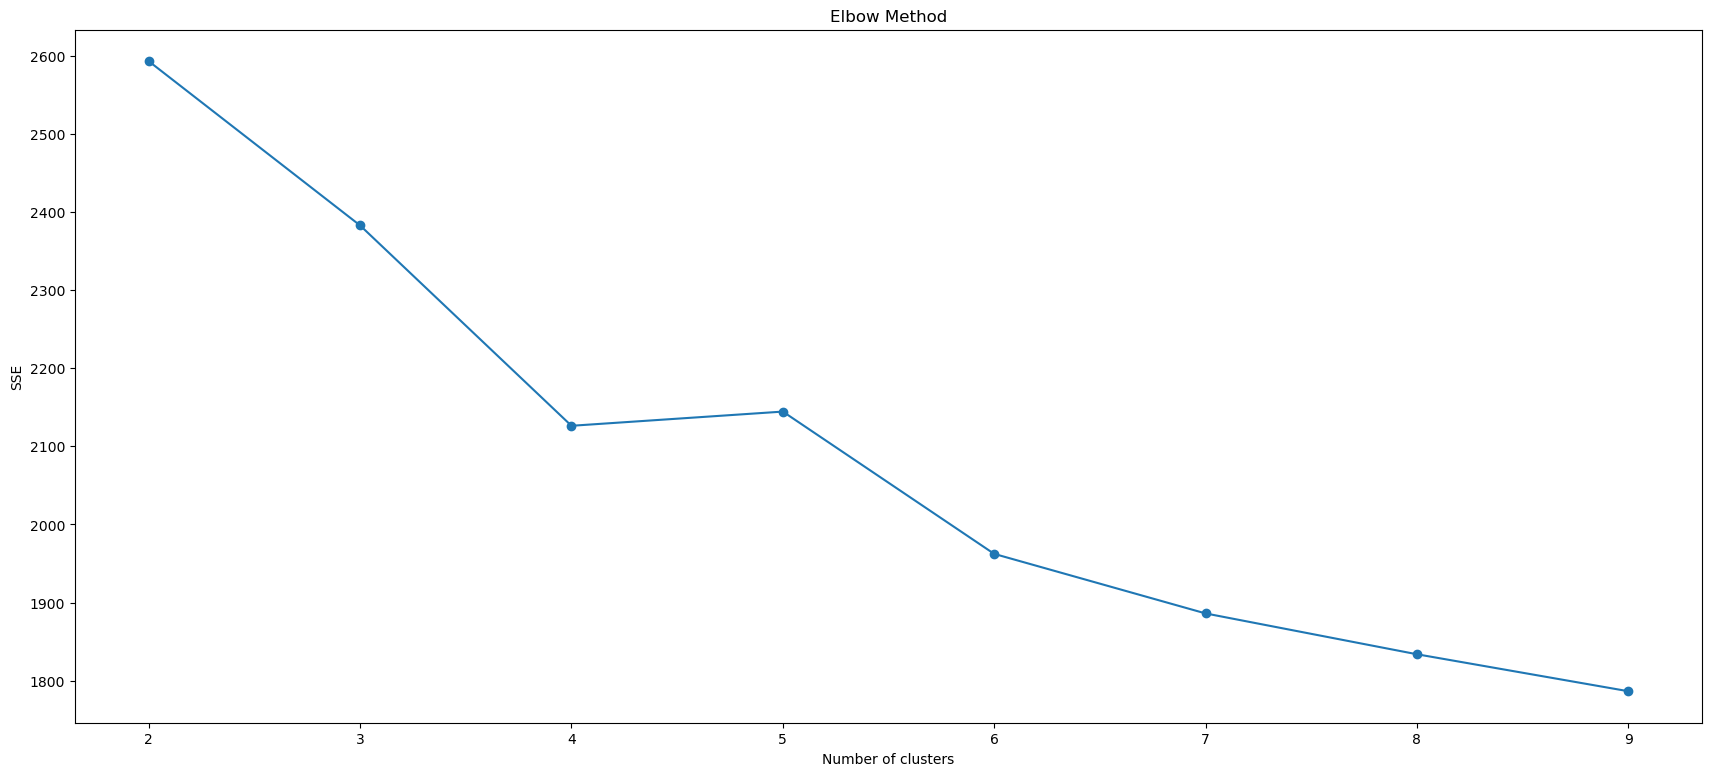

In [27]:
plt.figure(figsize=(21,9))
plt.plot(K, SSE, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')

We can observe that the 'elbow' is created when we have 4 clusters.

##### Silhouette Score
The Silhouette Score measures how much a customer is similar to the others present in its cluster. We want to identify the number of clusters for which this score is maximum.

Text(0, 0.5, 'Silhouette Score')

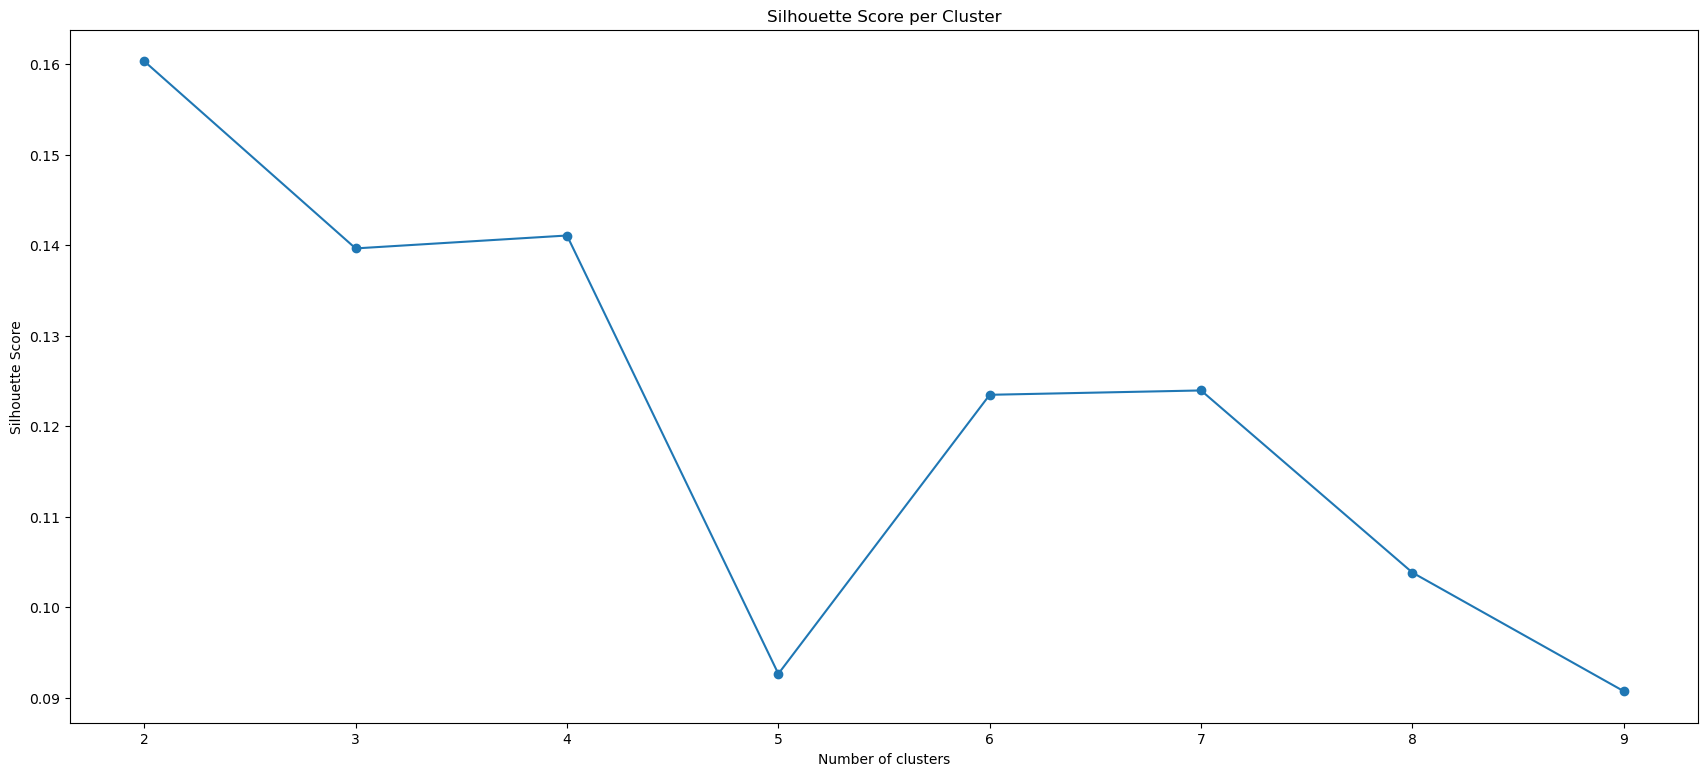

In [28]:
plt.figure(figsize=(21,9))
plt.plot(K, silhouette, marker='o')
plt.title('Silhouette Score per Cluster')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

By analizing the Elbow graph and the Silhouette scores across the different numbers of clusters we can conclude that the optimal number of clusters is 4. This is because we can observe that for K=4 the curve bends in the Elbow Method and we have a reasonably high Silhouette scores.

#### Tune the K-means algorithm
Tune the K-means algorithm with the chosen number of clusters, in this case 4. 

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++',random_state=42)
kmeans.fit(dataset)
clusters = kmeans.predict(dataset)

Create a copy of the dataset and add the 'Cluster' column, which indicated the cluster to which each customer is assigned. In addition add back the 'ID' column that we will use later for matching.

In [30]:
df = dataset.copy()
df['Cluster'] = clusters
df['ID'] = df_raw['ID']

# Get the number of customers in each cluster
for cluster in df['Cluster'].unique():
    print(f'Number of customers in cluster {cluster}: {df['Cluster'].value_counts()[cluster]}')


Number of customers in cluster 2: 332
Number of customers in cluster 1: 403
Number of customers in cluster 0: 647
Number of customers in cluster 3: 854


Visualize the number of customers in each cluster

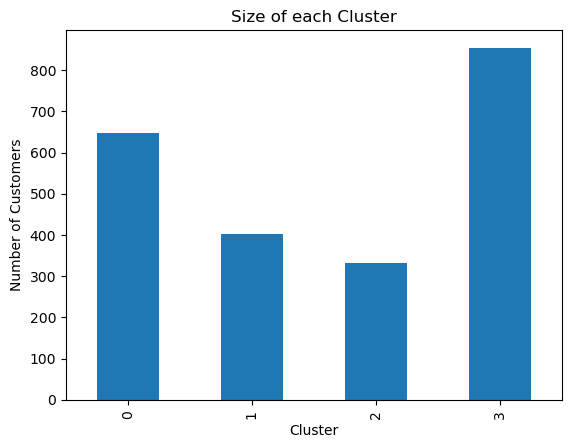

In [31]:
df['Cluster'].value_counts().sort_index().plot(kind='bar')
plt.title('Size of each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()

#### Visualize the clusters
One way the visualize the cluster is using Principal Component Analysis (PCA).

PCA is a Dimensionality Reduction technique that creates a linear transformation to reduce the dimensions, enabling us to visualize the clusters in a 2-dimensional plot.

In [32]:
pca = PCA(n_components=2) 
dataset_pca = pca.fit_transform(df)

Visualize the clusters in a 2-Dimensional space.

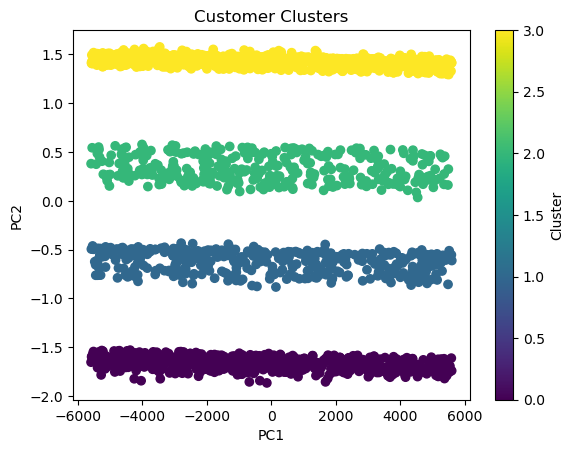

In [33]:
plt.figure()
plt.scatter(dataset_pca[:, 0], dataset_pca[:, 1], c=df['Cluster'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Customer Clusters')
plt.colorbar(label='Cluster')
plt.show()

We can clearly distinguish the four clusters. They are compact and well distinguishable, suggesting a good performance of the algorithm.

## Model interpretation

In [34]:
# Add the 'Year_enroll' column from df_clean to df_raw
df_raw['Year_enroll'] = df_clean['Year_enroll']

# Merge df_raw with df_clean to enhance the dataset
df_enh = pd.merge(df, df_raw, on='ID')
df_enh.head()

,Year_Birth_x,Education_x,Marital_Status_x,Income_x,Kidhome_x,Teenhome_x,Recency_x,MntWines_x,MntFruits_x,MntMeatProducts_x,...,AcceptedCmp3_y,AcceptedCmp4_y,AcceptedCmp5_y,AcceptedCmp1_y,AcceptedCmp2_y,Complain_y,Z_CostContact,Z_Revenue,Response_y,Year_enroll_y
0,0.621359,0.5,1.0,0.084832,0.0,0.0,0.585859,0.425318,0.442211,0.316522,...,0,0,0,0,0,0,3,11,1,2012.0
1,0.592233,0.5,1.0,0.067095,0.5,0.5,0.383838,0.007368,0.005025,0.003478,...,0,0,0,0,0,0,3,11,0,2014.0
2,0.699029,0.5,0.0,0.105097,0.0,0.0,0.262626,0.285332,0.246231,0.073623,...,0,0,0,0,0,0,3,11,0,2013.0
3,0.883495,0.5,0.0,0.037471,0.5,0.0,0.262626,0.007368,0.020101,0.011594,...,0,0,0,0,0,0,3,11,0,2014.0
4,0.854369,1.0,0.0,0.085065,0.5,0.0,0.949495,0.115874,0.216080,0.068406,...,0,0,0,0,0,0,3,11,0,2014.0


### Analyze the distribution of the features in the clusters
We want to analyze how the features are distributed in each cluster to have a better understanding of each customer segment. This will allow us to create personalized marketing strategies for each cluster.

Analysis for numerical features

In [35]:
(
    df_enh.groupby('Cluster').agg(
        nu_obs = ('ID', 'count')

        # Numerical features
        , avg_year_birth = ('Year_Birth_y', 'mean')
        , avg_income = ('Income_y', 'mean')
        , avg_kidhome = ('Kidhome_x', 'mean')
        , avg_teenhome = ('Teenhome_x', 'mean')
        , avg_mntWines = ('MntWines_y', 'mean')
        , avg_mntFruits = ('MntFruits_y', 'mean')
        , avg_mntMeatProducts = ('MntMeatProducts_y', 'mean')
        , avg_mntFishProducts = ('MntFishProducts_y', 'mean')
        , avg_mntSweetProducts = ('MntSweetProducts_y', 'mean')
        , avg_mntGoldProducts = ('MntGoldProds_y', 'mean')
        , avg_numWebPurchases = ('NumWebPurchases_y', 'mean')
        , avg_numCatalogPurchases = ('NumCatalogPurchases_y', 'mean')
        , avg_numStorePurchases = ('NumStorePurchases_y', 'mean')
        , avg_numWebVisitsMonth = ('NumWebVisitsMonth_y', 'mean')
        , avg_year_enroll = ('Year_enroll_y', 'mean')


    )
    .reset_index()
    .sort_values('avg_year_birth')
)

,Cluster,nu_obs,avg_year_birth,avg_income,avg_kidhome,avg_teenhome,avg_mntWines,avg_mntFruits,avg_mntMeatProducts,avg_mntFishProducts,avg_mntSweetProducts,avg_mntGoldProducts,avg_numWebPurchases,avg_numCatalogPurchases,avg_numStorePurchases,avg_numWebVisitsMonth,avg_year_enroll
0,0,647,1965.867079,68034.113530,0.030139,0.290572,536.693972,47.808346,279.395672,67.857805,50.905719,66.924266,5.632148,4.499227,8.638331,4.074189,2013.001548
2,2,332,1969.084337,59554.734139,0.170181,0.153614,486.219880,37.936747,283.201807,51.256024,38.382530,59.888554,4.957831,4.129518,5.987952,5.286145,2012.800604
1,1,403,1970.240695,49186.852417,0.239454,0.241935,236.694789,23.667494,148.163772,34.935484,23.193548,41.923077,3.754342,2.260546,5.483871,5.255583,2013.069479
3,3,854,1970.291569,38754.810651,0.380562,0.268735,87.747073,6.757611,45.601874,10.471897,6.501171,21.565574,2.725995,0.888759,3.689696,6.296253,2013.117371


Analysis for categorical features

In [36]:
(
    df_enh.groupby('Cluster').agg(
        nu_obs = ('ID', 'count')
        , avg_year_birth = ('Year_Birth_y', 'mean') # for sorting purposes

        # Categorical features
        , mode_education = ('Education_y', lambda x: x.value_counts().index[0])
        , mode_marital = ('Marital_Status_y', lambda x: x.value_counts().index[0])

    )
    .reset_index()
    .sort_values('avg_year_birth')
)

,Cluster,nu_obs,avg_year_birth,mode_education,mode_marital
0,0,647,1965.867079,Graduation,Married
2,2,332,1969.084337,Graduation,Single
1,1,403,1970.240695,Graduation,Single
3,3,854,1970.291569,Graduation,Married


Analysis for boolean features

In [37]:
(
    df_enh.groupby('Cluster').agg(
        nu_obs = ('ID', 'count')
        , avg_year_birth = ('Year_Birth_y', 'mean') # for sorting purposes

        # Boolean features
        , mode_acceptedCmp1 = ('AcceptedCmp1_y', lambda x: x.value_counts().index[0])
        , mode_acceptedCmp2 = ('AcceptedCmp2_y', lambda x: x.value_counts().index[0])
        , mode_acceptedCmp3 = ('AcceptedCmp3_y', lambda x: x.value_counts().index[0])
        , mode_acceptedCmp4 = ('AcceptedCmp4_y', lambda x: x.value_counts().index[0])
        , mode_acceptedCmp5 = ('AcceptedCmp5_y', lambda x: x.value_counts().index[0])
        , mode_complain = ('Complain_y', lambda x: x.value_counts().index[0])
        , mode_response = ('Response_y', lambda x: x.value_counts().index[0])

    )
    .reset_index()
    .sort_values('avg_year_birth')
)

,Cluster,nu_obs,avg_year_birth,mode_acceptedCmp1,mode_acceptedCmp2,mode_acceptedCmp3,mode_acceptedCmp4,mode_acceptedCmp5,mode_complain,mode_response
0,0,647,1965.867079,0,0,0,0,0,0,0
2,2,332,1969.084337,0,0,0,0,0,0,1
1,1,403,1970.240695,0,0,0,0,0,0,0
3,3,854,1970.291569,0,0,0,0,0,0,0


### Visualize the distribution of the features in the clusters

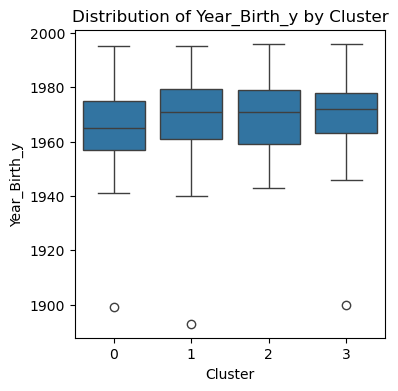

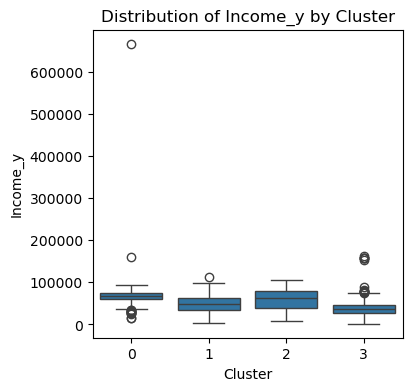

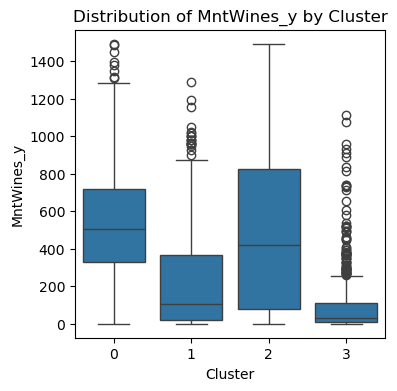

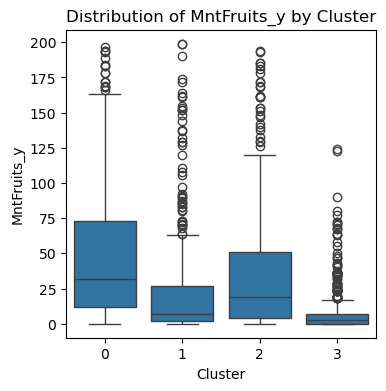

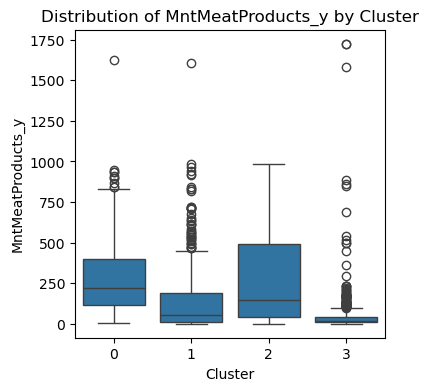

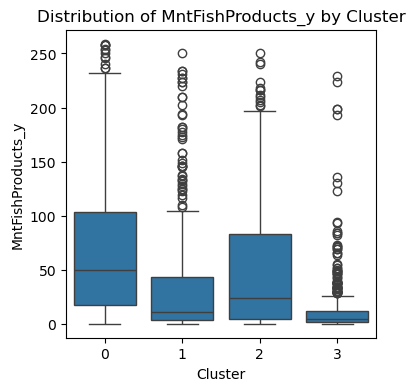

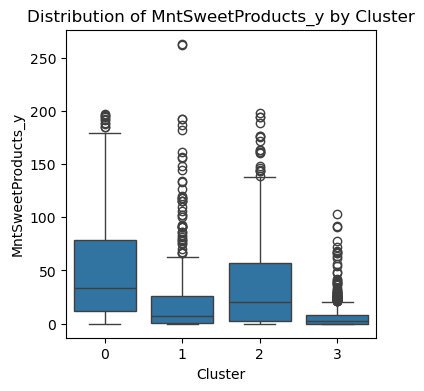

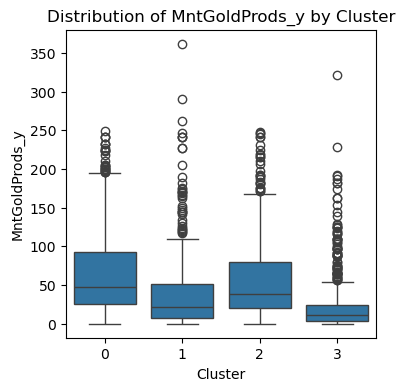

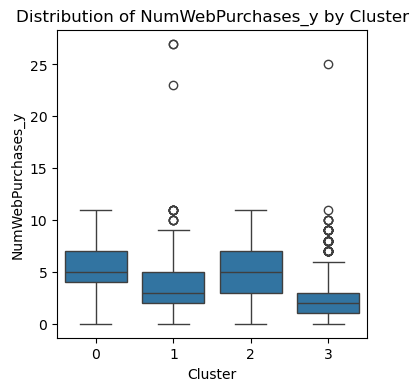

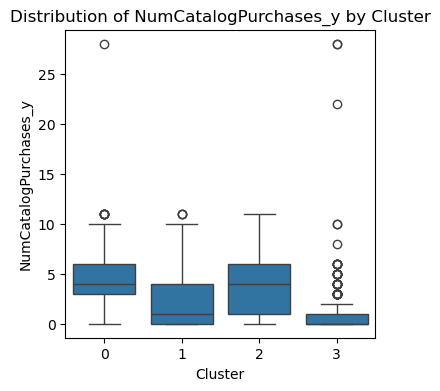

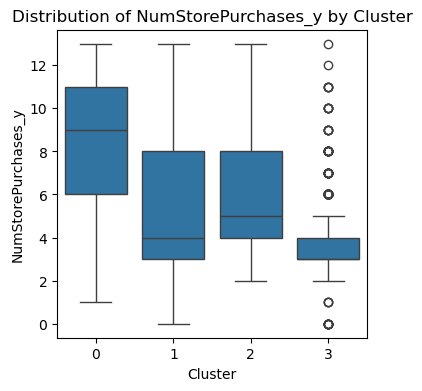

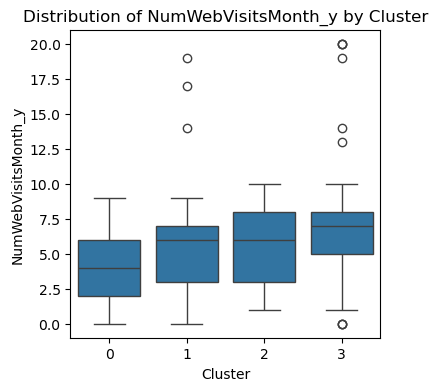

In [38]:
features = ['Year_Birth_y', 'Income_y', 'MntWines_y', 
            'MntFruits_y', 'MntMeatProducts_y', 'MntFishProducts_y',
            'MntSweetProducts_y', 'MntGoldProds_y','NumWebPurchases_y', 
            'NumCatalogPurchases_y', 'NumStorePurchases_y', 'NumWebVisitsMonth_y']

for column in features:
    if column in df_enh.columns:
        plt.figure(figsize=(4, 4))
        sns.boxplot(data=df_enh, x='Cluster', y=column)
        plt.title(f'Distribution of {column} by Cluster')
        plt.show()

### Business insights

#### Cluster 0 - Mature wealthy customers 
Cluster 0 is characterized by older, married customers with high income (~68K) and a low number of kids at home. They tend to have high spending with store, web and catalog purchases but they were not reponsive to the last marketing campaings.

Goal: Increase loyalty and purchases of luxury products.

Strategy: Since they are regular high-spending customers they could partecipate in a premium loyalty program and receive catalogs containing exclusive products. Promote bundled packages with high-end products.

#### Cluster 1 - Young mid-income single customers
Cluster 1 is characterized by single customers with lower income (~49K) and product spending. They prefer to shop in store rather than online and they have a moderate number of website visits. They have lower number of purchases and were not responsive to the last campaigns.

Goal: Increase frequency of purchase and up-selling.


Strategy: Offer digital discounts that can be used in store and website promotions. Offer monthly promotions on essential products (also for children) bundled with more expensive items to increase frequency of purchase and cross-selling. 

#### Cluster 2 - Mature stable customers
Cluster 2 is characterized by single customers with moderate income (~59K) and spending. They purchase in a balanced way across the different shopping channels. The customers have a low number of children and teens at home and they accepted the offers in the last marketing campaign but not the ones in the campaigns before.

Goal: Increase up-selling and cross-selling 

Strategy: Offer cross-channels discounts to increase conversion, personalized product recommendations and middle-range bundles offers.

#### Cluster 3 - Young large households with limited budged customers
Cluster 3 is characterized by married customers with a higher number of children and kids at home. They have the lowest income (~38K) and product spending, preferring in store and online purchases over catalog and they have the highest number of website visits. As for the other clusters, the customers weren't responsive to the marketing campaigns.

Goal: Increase frequency of purchase 

Strategy: Offer highly discounted promotions for essential products through web site and create bundle packages tageted to young families. Focus on online promotions, family loyalty programs and seasonal promotions (holidays, birthdays)

It is important to notice that the clusters with the highest number of observations are Cluster 0 and Cluster 3, so to maximize the Return of Investment (ROI) of future campaings it would be appropriate to mainly focus on the needs of the customers of these clusters.

Implementing cluster specific marketing strategies would help increase the campaings' effectiveness because each cluster receives promotions and communications tailored to their needs and behaviors; offering loyalty programs and personalized offers would help achieve higher engagement and sales. By understanding the responsiveness of the clusters and their distribution would help the company to reallocate resources in order to have a higher ROI.